In [16]:
import csv
import json
import jieba
import jieba.analyse
import pandas as pd
import numpy as np
from collections import Counter

In [17]:
# 讀取JSON檔案
with open('novel_clean.json', encoding='utf-8') as f:
    data = json.load(f)

# 寫入CSV檔案
with open('Novel.csv', 'w', encoding='utf-8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['chapter', 'link', 'content'])  # 寫入標頭
    for chapter, chapter_data in data.items():
        link = chapter_data['link']
        content = '\n'.join(chapter_data['content'])
        writer.writerow([chapter, link, content])


In [18]:
data = pd.read_csv('Novel.csv')
data.head()

,chapter,link,content
0,第零卷：心與歌 第一章：修羅之心,https://m.wfxs.tw/xs-806408/du-76370626/,世界曆2009年。\n無月之夜。\n漆黑的天幕之下，一個巨大的半圓型罩子散發著刺眼的光。\n...
1,第零卷：心與歌 第二章：突如其來的死別,https://m.wfxs.tw/xs-806408/du-76370682/,"千黯街，夜叉王王宮主殿.\n一個坐在窗邊，一身白衣，宛如雪之精靈般的小女孩,正帶著一臉可以和..."
2,第零卷：心與歌 第三章：星之心,https://m.wfxs.tw/xs-806408/du-76370729/,落星慢慢的走在千黯街外圍的街道上，這裏應該是自己和小夕相遇後待得最久的地方了吧。\n具體來說...
3,第零卷：心與歌 終章：星之歌,https://m.wfxs.tw/xs-806408/du-76370769/,"少年的手伸向一無所有的半空，五指微張，慢慢的他的視野變得越來越模糊,\n然後少年失去了意識。..."
4,第零卷：心與歌 後記,https://m.wfxs.tw/xs-806408/du-76370823/,呀，因為第零卷是外傳形式的，改動程度也是最小的，所以微塵就先把它整個發上來了。\n 雖然改...


In [19]:
documents = ['我叫鄭宇皓，正在進行測試']#一段字串
# 精確模式
for sentence in documents:
    seg_list = jieba.cut(sentence)#用jieba做cut斷詞
    print('/'.join(seg_list))#印出來的內容用斜線隔開

我/叫/鄭宇皓/，/正在/進行/測試


In [20]:
jieba.load_userdict('./userdict.txt')#自己建立斷詞文本

for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/叫/鄭宇皓/，/正在/進行/測試


In [23]:
#新增一個新欄位
data['seg'] = ""
data.head()

,chapter,link,content,seg
0,第零卷：心與歌 第一章：修羅之心,https://m.wfxs.tw/xs-806408/du-76370626/,世界曆2009年。\n無月之夜。\n漆黑的天幕之下，一個巨大的半圓型罩子散發著刺眼的光。\n...,
1,第零卷：心與歌 第二章：突如其來的死別,https://m.wfxs.tw/xs-806408/du-76370682/,"千黯街，夜叉王王宮主殿.\n一個坐在窗邊，一身白衣，宛如雪之精靈般的小女孩,正帶著一臉可以和...",
2,第零卷：心與歌 第三章：星之心,https://m.wfxs.tw/xs-806408/du-76370729/,落星慢慢的走在千黯街外圍的街道上，這裏應該是自己和小夕相遇後待得最久的地方了吧。\n具體來說...,
3,第零卷：心與歌 終章：星之歌,https://m.wfxs.tw/xs-806408/du-76370769/,"少年的手伸向一無所有的半空，五指微張，慢慢的他的視野變得越來越模糊,\n然後少年失去了意識。...",
4,第零卷：心與歌 後記,https://m.wfxs.tw/xs-806408/du-76370823/,呀，因為第零卷是外傳形式的，改動程度也是最小的，所以微塵就先把它整個發上來了。\n 雖然改...,


In [25]:
jieba.analyse.set_stop_words('stopwords.txt') 
index = 0
for documents in data['content']:
    seg_list = jieba.analyse.extract_tags(str(documents), 150) #前150個權重最高的單詞
    data['seg'].iloc[index] = seg_list #存入seg_list
    index += 1

In [27]:
 data['seg']

0      [少年, 青年, 一個, 鎖鏈, 這個, 為什, 露出, 身影, 已經, 眉頭, 臉上, 修...
1      [紫發, 小女孩, 男子, 男孩, 一個, 身體, 夕少爺, 半臉, 小夕, 起來, 那個,...
2      [落星, 少年, 一個, 白鬼, 小夕, 已經, 叔叔, 起來, 沒有, 這樣, 一點, 小...
3      [少年, 少女, 小夕, 聲音, 點點頭, 為什, 沒有, 感覺, 自己, 老大, 這樣, ...
4      [改動, 第零, 因為, 微塵, 發上, 有點, 還是, 但是, 外傳, 整個, 雖然, 還...
                             ...                        
444    [少女, 那個, 時候, 夜叉, 黑曜, 起來, 項鏈, 這個, 一個, 千雨, 沒有, 他...
445    [不要, 少女, 為什, 這個, 開始, 沒有, 此時, 那個, 這樣, 回來, 一邊, 已...
446    [路勁, 那個, 驕陽區, 這個, 一個, 離開, 這樣, 現在, 之子, 資料, 樣子, ...
447    [少年, 時間, 自己, 已經, 時候, 一個, 破壞, 盡管, 這個, 這種, 身體, 溫...
448    [安貞, 一個, 這個, 少女, 為什, 因為, 沒有, 那個, 自己, 修伊爾, 反應, ...
Name: seg, Length: 449, dtype: object

In [29]:
data_seg_list = data['seg'].tolist()
type(data_seg_list)

list

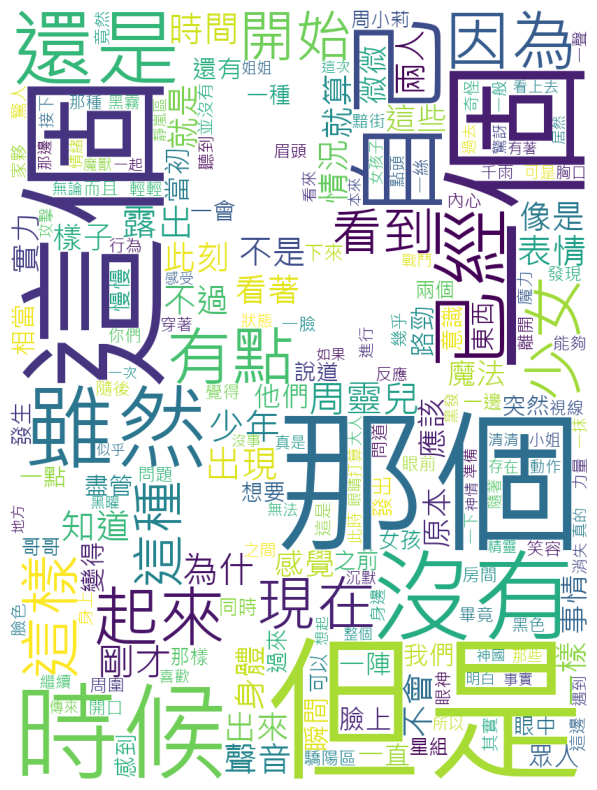

In [42]:
flat = [x for datalist in data_seg_list for x in datalist]
diction = Counter(flat)

from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

mask = np.array(Image.open("star.jpg"))
font = r"C:\Windows\Fonts\msjh.ttc"

wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [44]:
#結果分析

#作者常用字:這個、那個、但是、時候、雖然
#出現次數較多的人物名稱:周靈兒(女主角)、路勁(男二)、周小莉
#少女出現次數>少年(女性角色較多)